# ML-Workflow

In diesem Projekt untersuchen wir, wie verschiedene Faktoren den Umsatz eines Restaurants beeinflussen und erstellen ein Modell zur Vorhersage des Umsatzes basierend auf mehreren Merkmalen. 

Der Datensatz enthält diverse Informationen über jedes Restaurant, wie die Lage, das Angebot, die Bewertung, die Marketingausgaben und viele weitere.

> **Hinweis**: Der verwendete Datensatz kann [hier](https://www.kaggle.com/datasets/anthonytherrien/restaurant-revenue-prediction-dataset/data) heruntergeladen werden.<br>
> **Hinweis**: Des Weiteren wird dieser [Blog-Post](https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8) empfohlen. 

## 1. Datenvorbereitung und Bereinigung

#### 1.1 Daten laden

In [1]:
import pandas as pd

In [2]:
dataset_filepath = 'data/restaurant_data.csv'
df_restaurants   = pd.read_csv(dataset_filepath)

In [3]:
df_restaurants.head(5)

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


#### 1.2 Datenbereinigung

In [4]:
nan_values = df_restaurants.isna().sum().sum()
print(f'Der Datensatz enthält {nan_values} NaN-Werte.')

if nan_values > 0:
    df_restaurants = df_restaurants.dropna()
    print('NaN-Werte wurden entfernt.')

Der Datensatz enthält 0 NaN-Werte.


#### 1.3 Kurze und knappe Explorative Datenanalyse (EDA)

In [5]:
import matplotlib.pyplot as plt

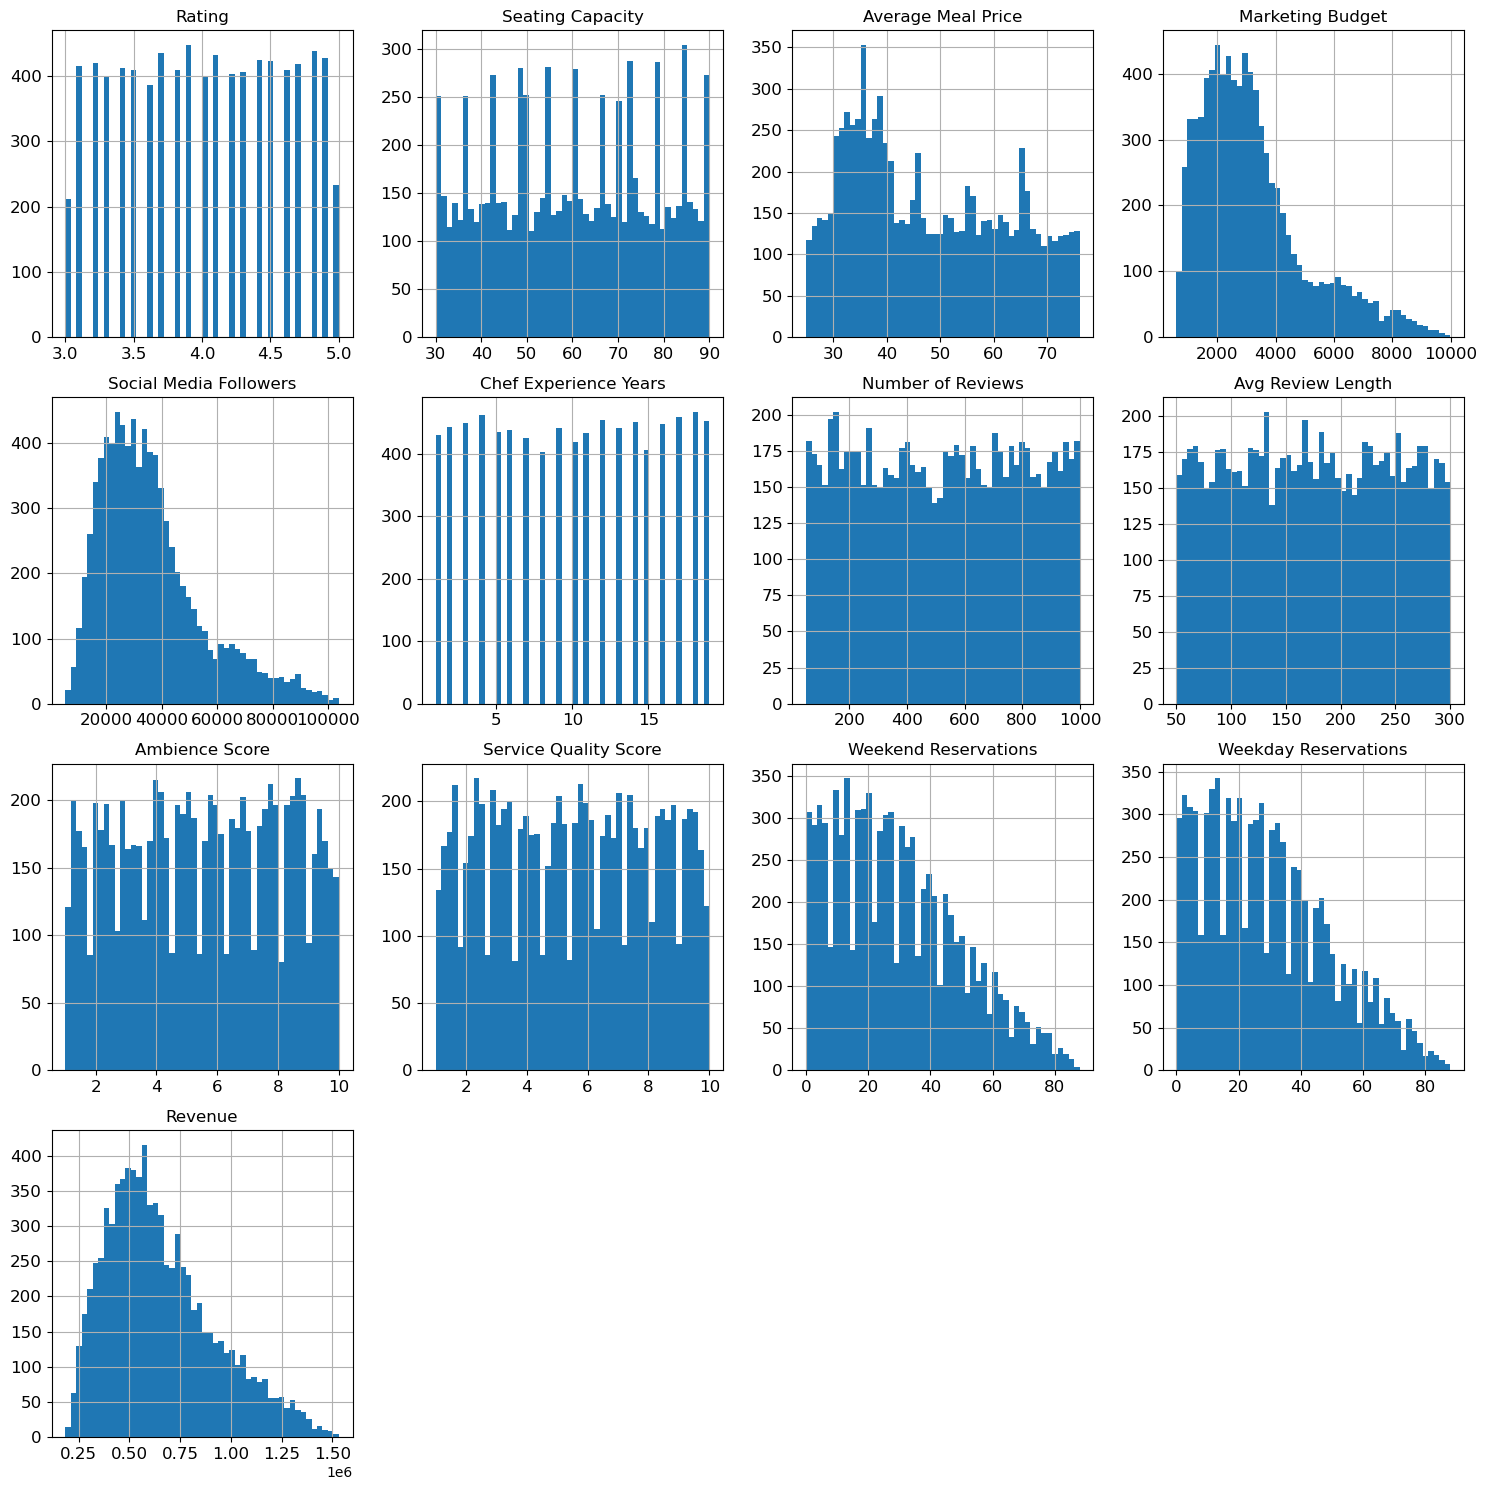

In [6]:
df_restaurants.hist(figsize=(15, 15), bins=50, xlabelsize=12, ylabelsize=12)
plt.tight_layout() # optional to improve presentation of plots (overlap of axis labels)
plt.show()

In [7]:
df_restaurants.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [27]:
df_restaurants[['Rating', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Ambience Score', 'Service Quality Score'
]].corr()

,Rating,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Ambience Score,Service Quality Score
Rating,1.000000,-0.002265,0.263448,0.289559,0.022192,0.007099,0.000887
Average Meal Price,-0.002265,1.000000,-0.002054,-0.005753,0.000401,-0.001094,0.011714
Marketing Budget,0.263448,-0.002054,1.000000,0.987511,0.021612,0.008120,-0.000693
Social Media Followers,0.289559,-0.005753,0.987511,1.000000,0.022943,0.007428,0.000210
Chef Experience Years,0.022192,0.000401,0.021612,0.022943,1.000000,-0.001288,-0.008508
Ambience Score,0.007099,-0.001094,0.008120,0.007428,-0.001288,1.000000,0.000612
Service Quality Score,0.000887,0.011714,-0.000693,0.000210,-0.008508,0.000612,1.000000


#### 1.4 Feature-Label-Split

In [24]:
# Label und wichtige Features definieren
label    = 'Revenue'
features = ['Location', 
            'Cuisine', 
            'Rating', 
            'Average Meal Price', 
            'Marketing Budget', 
            'Social Media Followers', 
            'Chef Experience Years', 
            'Ambience Score', 
            'Service Quality Score', 
            'Parking Availability'
]

# Features und Label extrahieren
X = df_restaurants[features]
y = df_restaurants[label]

## 2. Feature Engineering

#### 2.1 One-Hot-Encoding

Die Features `Location`, `Cuisine` und `Parking Availability` sind kategorisch und können daher nicht direkt im Modell verwendet werden. Mithilfe von One-Hot-Encoding (OHE) können wir diese Features jedoch in numerische Variablen umwandeln und die Daten für das Modell transformieren.

In [9]:
%%script false --no-raise-error # Damit diese Zelle nicht ausgeführt wird

# Beispiel an 'Cuisine'
X_copy = X.copy()
X_copy.drop('Cuisine', axis=1, inplace=True)

# One-Hot-Encoding
one_hot_feature = pd.get_dummies(X['Cuisine'], prefix='Cuisine')

# Zusammenführen
X_copy_cuisine_encoded = pd.concat([X_copy, one_hot_feature], axis=1)
X_copy_cuisine_encoded.head(5)

In [10]:
# ODER ganz direkt in einem Schritt:
X_encoded = pd.get_dummies(X, columns=['Location', 'Cuisine', 'Parking Availability'])
X_encoded.head(5)

,Rating,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Ambience Score,Service Quality Score,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,4.0,73.98,2224,23406,13,1.3,7.0,False,True,False,False,False,False,False,True,False,False,True
1,3.2,28.11,4416,42741,8,2.6,3.4,True,False,False,False,False,False,False,False,True,False,True
2,4.7,48.29,2796,37285,18,5.3,6.7,False,True,False,False,False,False,True,False,False,True,False
3,4.4,51.55,1167,15214,13,4.6,2.8,False,True,False,False,False,False,True,False,False,False,True
4,4.9,75.98,3639,40171,9,8.6,2.1,True,False,False,False,False,False,False,True,False,True,False


#### 2.2 Weitere Features aus bestehenden Features herleiten

In [11]:
X_encoded['Total Reservations'] = df_restaurants['Weekend Reservations'] + df_restaurants['Weekday Reservations']

## 3. Daten-Skalierung und Train-Test-Split

#### 3.1 Skalierung der Daten

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
%%script false --no-raise-error

scaler = StandardScaler().fit(X_encoded)

X_scaled = scaler.transform(X_encoded)
X_scaled

In [14]:
# ODER in einem Schritt:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)
X_scaled


array([[-0.01420209,  1.81944091, -0.54486079, ..., -0.99880568,
         0.99880568, -1.35732899],
       [-1.39009911, -1.38021644,  0.65637529, ..., -0.99880568,
         0.99880568, -0.15376521],
       [ 1.1897078 ,  0.02743748, -0.23139955, ...,  1.00119574,
        -1.00119574, -0.57663897],
       ...,
       [ 1.1897078 , -0.07161448,  1.49647333, ..., -0.99880568,
         0.99880568,  1.47267233],
       [-1.56208624, -0.23484095, -1.37619069, ...,  1.00119574,
        -1.00119574, -1.03204148],
       [-0.01420209,  1.61645415, -0.66597082, ..., -0.99880568,
         0.99880568, -1.35732899]])

#### 3.2 Train-Test-Split

> **Hinweis**: Sollte man den Train-Test-Split schon vor der Skalierung (3.1 Skalierung der Daten) gemacht haben, dann wird für die Skalierung der Testdaten der gleiche Scaler verwendet, der auf den Trainingsdaten gefittet wurde.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}\nX_test:  {X_test.shape}, y_test:  {y_test.shape}')

X_train: (6694, 19), y_train: (6694,)
X_test:  (1674, 19), y_test:  (1674,)


## 4. Modelltraining und Validierung

#### 4.1 Modell trainieren und Vorhersagen treffen

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions = model.predict(X_test)

#### 4.3 Evaluation

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f'Der MSE auf den Testdaten beträgt: {mse}')

Der MSE auf den Testdaten beträgt: 6865687987.922811


In [19]:
import math

rmse = math.sqrt(mse)
print(f'Wir liegen im Schnitt um {rmse:.2f} neben dem tatsächlichen Wert.')

Wir liegen im Schnitt um 82859.45 neben dem tatsächlichen Wert.


## 5. Analyse und Visualisierung

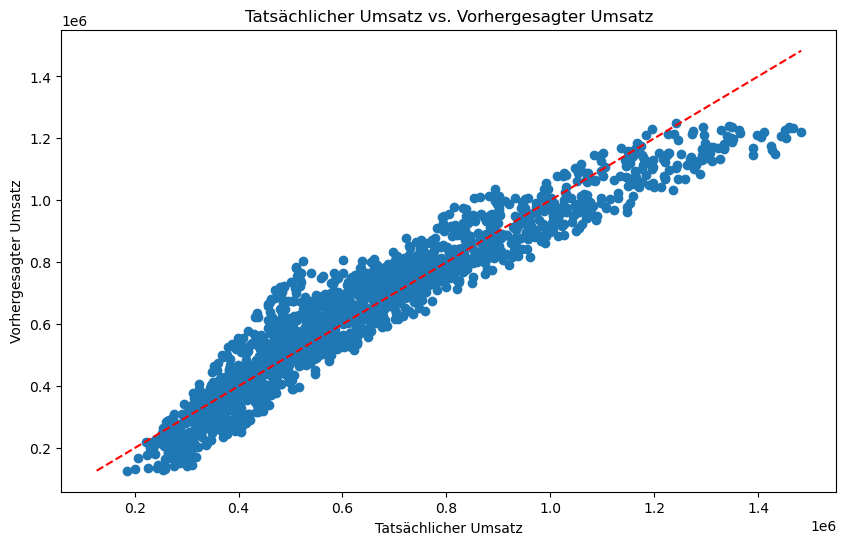

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions)

min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--', label='Wahre Werte')

plt.xlabel('Tatsächlicher Umsatz')
plt.ylabel('Vorhergesagter Umsatz')
plt.title('Tatsächlicher Umsatz vs. Vorhergesagter Umsatz')
plt.show()

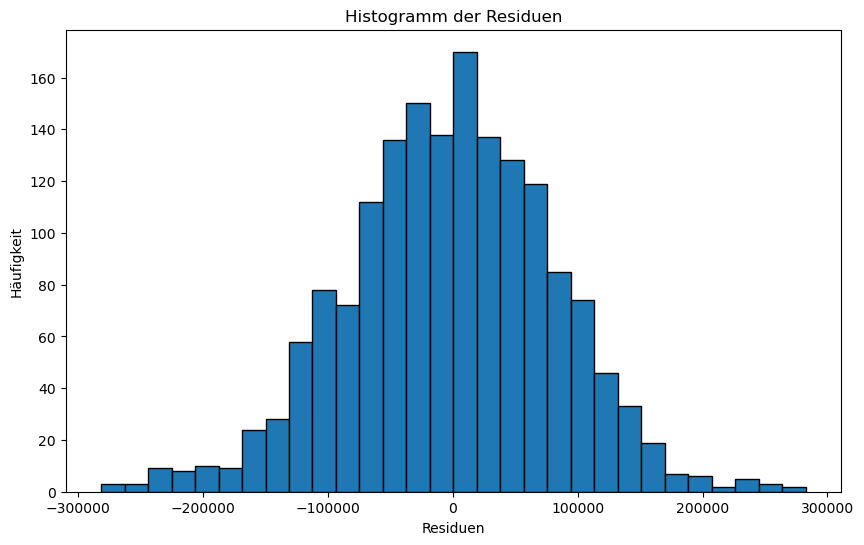

In [21]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Residuen')
plt.show()